<a href="https://colab.research.google.com/github/Shrey327/Machine_Learning/blob/main/model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import cv2
from glob import glob
from IPython.display import display


import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import (
    RandomFlip,
    RandomRotation,
    RandomZoom,
    RandomContrast,
    RandomTranslation,
)
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model
from keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    GlobalAveragePooling2D,
    Rescaling
)
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.utils import image_dataset_from_directory
from keras import Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/dataset_main.zip'  # Replace with your zip file path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('uploads/extracted_files')  # Replace with desired extraction path

print("File unzipped successfully!")

File unzipped successfully!


In [ ]:
categories = os.listdir("/content/uploads/extracted_files/dataset_main/images/images")
path = "/content/uploads/extracted_files/dataset_main/images/images"
categories

['food_and_organic_waste',
 'paper_cups',
 'aerosol_cans',
 'Organics',
 'paper_and_print',
 'metal_cans',
 'automobile wastes',
 'plastic_bags',
 'plastic waste',
 'styrofoam_containers',
 'glass waste',
 'shoes',
 'metal waste',
 'cardboard_boxes',
 'plastic_food_containers',
 'light bulbs',
 'steel_food_cans',
 'plastic_bottles',
 'E-waste',
 'plastic_detergent_bottles',
 'battery waste',
 'utensils',
 'clothing',
 'glass_containers',
 'plastic disposables']

In [ ]:
len(categories)

25

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
train = image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    shuffle=True,
    image_size=IMG_SIZE,
    validation_split=0.2,  # 20% for validation
    subset='training',
    seed=42
)

Found 24264 files belonging to 25 classes.
Using 19412 files for training.


In [ ]:
validation = image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # 20% for validation
    subset='validation',
    seed=42
)


Found 24264 files belonging to 25 classes.
Using 4852 files for validation.


In [ ]:
classes=train.class_names

In [ ]:
classes

['E-waste',
 'Organics',
 'aerosol_cans',
 'automobile wastes',
 'battery waste',
 'cardboard_boxes',
 'clothing',
 'food_and_organic_waste',
 'glass waste',
 'glass_containers',
 'light bulbs',
 'metal waste',
 'metal_cans',
 'paper_and_print',
 'paper_cups',
 'plastic disposables',
 'plastic waste',
 'plastic_bags',
 'plastic_bottles',
 'plastic_detergent_bottles',
 'plastic_food_containers',
 'shoes',
 'steel_food_cans',
 'styrofoam_containers',
 'utensils']

In [ ]:
for images, labels in train.take(1):
    print("Image batch shape: ", images.shape)
    print("Label batch shape: ", labels.shape)
    print("Labels: ", labels.numpy())

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 25)
Labels:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
train = train.prefetch(buffer_size=AUTOTUNE)
validation = validation.prefetch(buffer_size=AUTOTUNE)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
dropout_rate = 0.5

In [ ]:
learning_rate = 0.001

In [ ]:
input_shape = IMG_SIZE + (3,)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
base_model = ResNet50(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
base_model.trainable = True
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
no_layers = len(base_model.layers)
print(no_layers)

175


In [ ]:
model = Sequential()
model.add(RandomFlip('horizontal',input_shape=input_shape))
model.add(RandomRotation(0.2))a
model.add(RandomZoom(0.2))
model.add(RandomContrast(0.2))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(dropout_rate))
model.add(Dense(units=len(classes), kernel_regularizer=l2(0.01), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        51,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,638,937 (90.18 MB)

 Trainable params: 10,041,369 (38.30 MB)

 Non-trainable params: 13,597,568 (51.87 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Create a folder in your Drive to save checkpoints (optional)
checkpoint_dir = '/content/drive/MyDrive/model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# 3. Create the checkpoint callback
checkpoint_path = os.path.join(checkpoint_dir, 'best_model.keras')
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,  # Save full model (you can load it directly later)
    verbose=1
)

# 4. Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 5. Train with both callbacks
history = model.fit(
    train,
    epochs=15,
    validation_data=validation,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/15
607/607 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.5320 - loss: 2.0642
Epoch 1: val_loss improved from inf to 1.09201, saving model to /content/drive/MyDrive/model_checkpoints/best_model.keras
607/607 ━━━━━━━━━━━━━━━━━━━━ 313s 330ms/step - accuracy: 0.5321 - loss: 2.0635 - val_accuracy: 0.7378 - val_loss: 1.0920
Epoch 2/15
607/607 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7226 - loss: 1.0930
Epoch 2: val_loss improved from 1.09201 to 0.99518, saving model to /content/drive/MyDrive/model_checkpoints/best_model.keras
607/607 ━━━━━━━━━━━━━━━━━━━━ 199s 328ms/step - accuracy: 0.7226 - loss: 1.0930 - val_accuracy: 0.7599 - val_loss: 0.9952
Epoch 3/15
607/607 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.7670 - loss: 0.9169
Epoch 3: val_loss improved from 0.99518 to 0.82762, saving model to /content/drive/MyDrive/model_checkpoints/best_mod

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


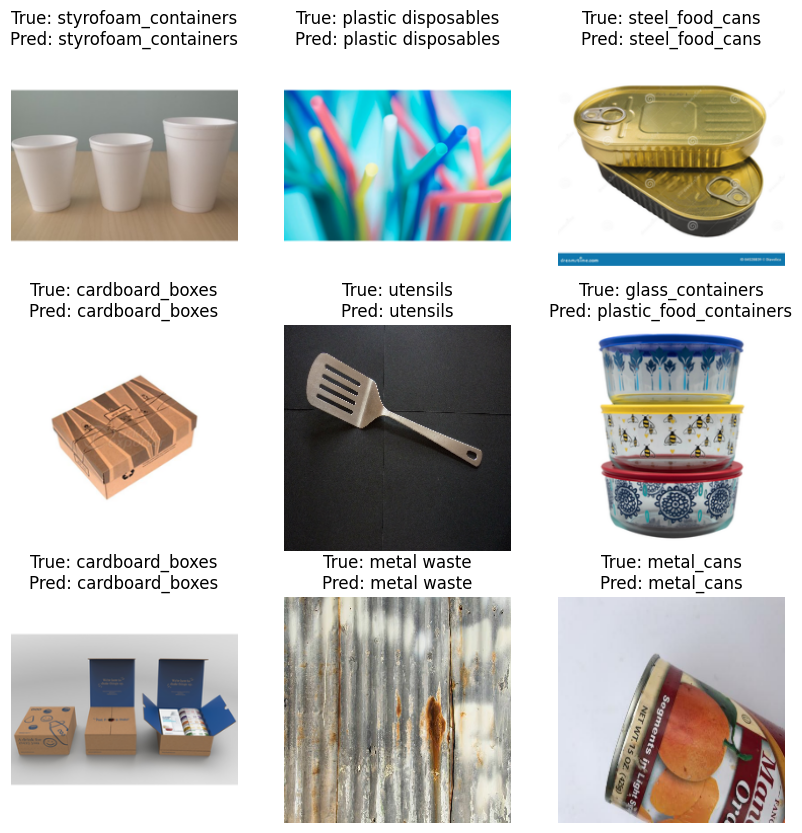

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in validation.take(1):
    # Predict the labels for the batch of images
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        true_label_index = tf.argmax(labels[i]).numpy()  # Get the index of the highest value (true class)
        predicted_label_index = predicted_labels[i].numpy()  # Get the index of the highest value (predicted class)

        true_label_name = classes[true_label_index]
        predicted_label_name = classes[predicted_label_index]

        plt.title(f'True: {true_label_name}\nPred: {predicted_label_name}')
        plt.axis("off")

plt.show()

In [ ]:
model.save('3RVision_2.keras')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Path to the image
image_path = "/content/REAMORE-3.png"

# Load and resize the image to the size the model was trained on (224, 224)
img = load_img(image_path, target_size=(224, 224)) # Changed target_size to (224, 224)

# Convert the image to a numpy array
img_array = img_to_array(img)

# Add a batch dimension (since the model expects a batch of images)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image (normalize pixel values for ResNet50)
img_array = preprocess_input(img_array)

# Make the prediction
predictions = model.predict(img_array)

# Interpret the prediction
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability
predicted_probability = np.max(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
print(f"Predicted class: {predicted_class}, Probability: {predicted_probability}")

Predicted class: [16], Probability: [0.5054079]


In [ ]:
classes[16]

'plastic waste'